# Fine tune BERT using Keras
## Binary text classification

### Load dataset
First, load a dataset. We’ll use the CoLA dataset from the GLUE benchmark, since it’s a simple binary text classification task, and just take the training split for now.

In [1]:
pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 34.2 MB/s eta 0:00:00


In [2]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.19.1
    Uninstalling huggingface-hub-0.19.1:
      Successfully uninstalled huggingface-hub-0.19.1


In [3]:
from datasets import load_dataset

In [4]:
dataset = load_dataset("glue", "cola")
dataset_train = dataset["train"]  # Just take the training split for now

Generating train split:   0%|          | 0/8551 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1043 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1063 [00:00<?, ? examples/s]

In [5]:
dataset_train.shape

(8551, 3)

In [6]:
dataset_train[0]

{'sentence': "Our friends won't buy this analysis, let alone the next one we propose.",
 'label': 1,
 'idx': 0}

In [7]:
dataset_train[-1]

{'sentence': 'What all did you get for Christmas?', 'label': 1, 'idx': 8550}

Next, load a tokenizer and tokenize the data as NumPy arrays. Note that the labels are already a list of 0 and 1s, so we can just convert that directly to a NumPy array without tokenization!

In [8]:
from transformers import AutoTokenizer

In [9]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenized_data = tokenizer(dataset_train['sentence'], return_tensors = "np", padding = True )

In [12]:
tokenized_data[-1]

Encoding(num_tokens=47, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [19]:
# # Tokenizer returns a BatchEncoding, but we convert that to a dict for Keras
tokenized_data = dict(tokenized_data)
tokenized_data['input_ids']

array([[ 101, 3458, 2053, ...,    0,    0,    0],
       [ 101, 1448, 1167, ...,    0,    0,    0],
       [ 101, 1448, 1167, ...,    0,    0,    0],
       ...,
       [ 101, 1135, 1110, ...,    0,    0,    0],
       [ 101,  146, 1125, ...,    0,    0,    0],
       [ 101, 1327, 1155, ...,    0,    0,    0]])

In [21]:
import numpy as np

In [23]:
# Label is already an array of 0 and 1
labels = np.array(dataset_train["label"])
labels

array([1, 1, 1, ..., 1, 1, 1])

### Now we load, compile, and fit the model.
 Note that Transformers models all have a default task-relevant loss function, so we don’t need to specify one unless we want to:

In [25]:
import tensorflow

In [28]:
from transformers import TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam

In [30]:
# Load and compile the model
model_1 = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased")

# Lower learning rates are often better for fine-tuning transformers. (# No loss argument!)
model_1.compile(optimizer=Adam(5e-5))

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Train the model

In [31]:
model_1.fit(tokenized_data, labels)

268/268 [==============================] - 128s 297ms/step - loss: 0.5020


#### Evaluate the model on test dataset

In [32]:
dataset_test = dataset["test"]

In [33]:
dataset_test.shape

(1063, 3)

In [35]:
dataset_test[8]

{'sentence': 'The more timid he feels, the more people he interviews without asking questions of.',
 'label': -1,
 'idx': 8}

In [37]:
# dataset_test["label"]

## No labels are given with test set

In [43]:
tokenized_test_data = tokenizer(dataset_test['sentence'], return_tensors = "np", padding = True )
tokenized_test_data[1]

Encoding(num_tokens=38, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])

In [45]:
tokenized_test_data = dict(tokenized_test_data)
tokenized_test_data['input_ids']

array([[  101,  2617, 15325, ...,     0,     0,     0],
       [  101,  1109,  1610, ...,     0,     0,     0],
       [  101,  2617,  2873, ...,     0,     0,     0],
       ...,
       [  101,  1287,  1450, ...,     0,     0,     0],
       [  101,  1287,  1450, ...,     0,     0,     0],
       [  101,   138,  3439, ...,     0,     0,     0]])

In [46]:
# Make predictions
predictions = model_1.predict(tokenized_test_data)

34/34 [==============================] - 10s 86ms/step


In [47]:
predictions

TFSequenceClassifierOutput(loss=None, logits=array([[-1.7971191 ,  1.2042781 ],
       [-1.6841577 ,  0.93260974],
       [-2.0218894 ,  1.5542257 ],
       ...,
       [-0.6345064 , -0.0722339 ],
       [-0.9656977 ,  0.23572257],
       [-2.1012955 ,  1.4157176 ]], dtype=float32), hidden_states=None, attentions=None)

 The predictions are logits, let's convert them to probabilities using softmax


In [49]:
probabilities = tensorflow.nn.softmax(predictions.logits, axis=-1)

In [50]:
probabilities

<tf.Tensor: shape=(1063, 2), dtype=float32, numpy=
array([[0.0473628 , 0.9526372 ],
       [0.06806707, 0.9319329 ],
       [0.0272224 , 0.97277755],
       ...,
       [0.36302182, 0.6369782 ],
       [0.23122266, 0.7687774 ],
       [0.02883201, 0.971168  ]], dtype=float32)>

The index of the highest probability can be considered as the class label (0 or 1)


In [51]:
predicted_labels = tensorflow.argmax(probabilities, axis=1)

In [52]:
predicted_labels

<tf.Tensor: shape=(1063,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 1, 1])>

In [53]:
# Output the predicted labels
predicted_labels.numpy()

array([1, 1, 1, ..., 1, 1, 1])

### There is no true labels for the test set:
So, it is useful to pick out a few samples from the dataset and look at the predicted labels and the input sentences side by side.

In [59]:
# Select a few random samples from the test set
samples = np.random.choice(len(dataset_test['sentence']), 5, replace=False)

# Display the sentences and their predicted labels
for i in samples:
    print(f"Sentence: {dataset_test['sentence'][i]}")
    print(f"Predicted Label: {predicted_labels.numpy()[i]}\n")


Sentence: Andy frequently eats sushi with his boss.
Predicted Label: 1

Sentence: We should put them somewhere in the dining room but it's not clear where.
Predicted Label: 1

Sentence: Whose sister always drinks milk?
Predicted Label: 1

Sentence: That we should call the police was suggested by her son.
Predicted Label: 1

Sentence: They are going home for to see their parents.
Predicted Label: 1



### Histogram of Predicted Classes
This can show you how many instances of each class the model has predicted.

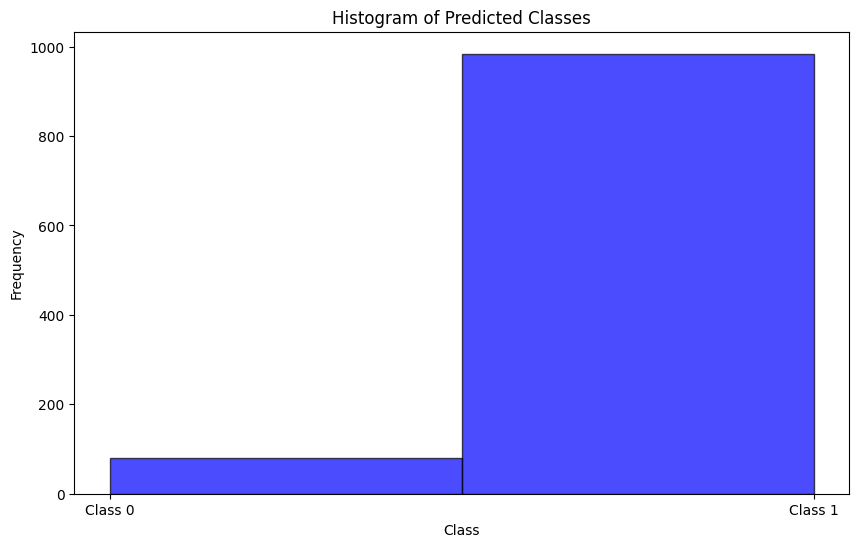

In [58]:
import matplotlib.pyplot as plt

# Convert predicted labels to a numpy array
predicted_labels_array = predicted_labels.numpy()

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(predicted_labels_array, bins=len(set(predicted_labels_array)), alpha=0.7, color='blue', edgecolor='black')

plt.title('Histogram of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(set(predicted_labels_array))), labels=[f'Class {i}' for i in range(len(set(predicted_labels_array)))])
plt.show()


#### Bar Chart of Prediction Counts
Similar to a histogram, a bar chart can provide a clear visual representation of the counts of each predicted class.

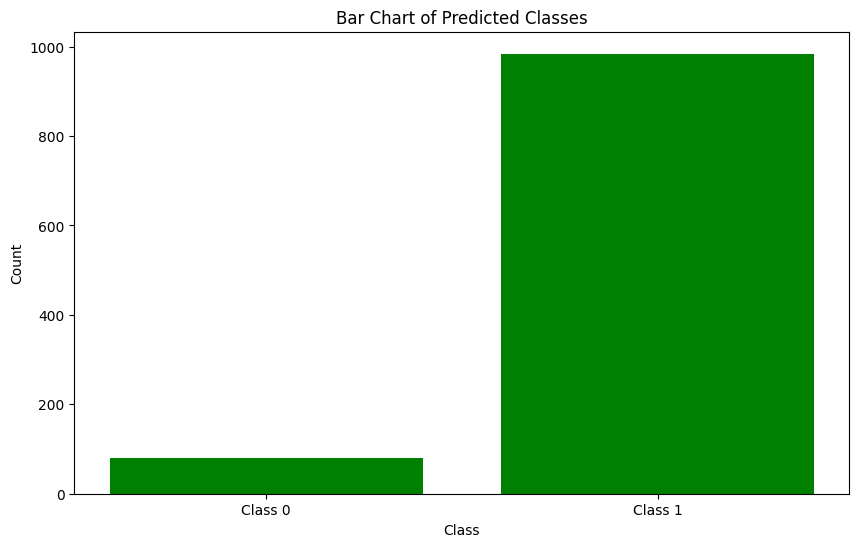

In [60]:
from collections import Counter

# Count the occurrences of each predicted class
counter = Counter(predicted_labels_array)

# Get the classes and their counts
classes = list(counter.keys())
counts = list(counter.values())

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='green')

plt.title('Bar Chart of Predicted Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=classes, labels=[f'Class {i}' for i in classes])
plt.show()
